In [1]:
!pip install transformers
!pip install gradio
!pip install timm
!pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.4/314.4 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.3 MB/s e

In [2]:
from transformers.utils import logging
logging.set_verbosity_error()

In [3]:
from transformers import pipeline

In [4]:
depth_estimator = pipeline(task="depth-estimation",
                        model="Intel/dpt-hybrid-midas")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/9.88k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/490M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/382 [00:00<?, ?B/s]

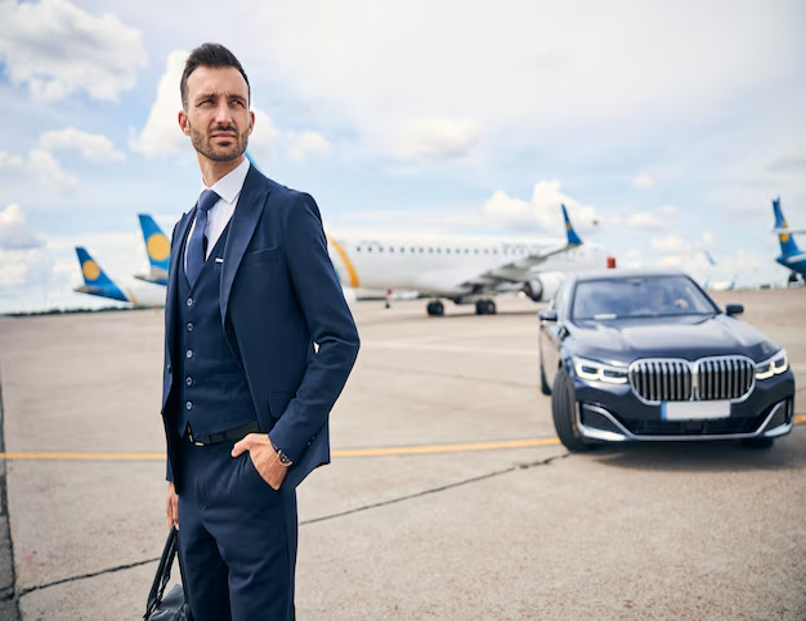

In [5]:
from PIL import Image
raw_image = Image.open('/content/1(1).png')
raw_image.resize((806, 621))

In [6]:
output = depth_estimator(raw_image)

In [7]:
output

{'predicted_depth': tensor([[[6.2487e+01, 6.5828e+01, 6.6920e+01,  ..., 8.2789e-01,
           1.6756e+00, 0.0000e+00],
          [6.4771e+01, 6.3655e+01, 6.4036e+01,  ..., 2.0170e+00,
           2.0762e+00, 5.2302e+00],
          [6.7267e+01, 6.6301e+01, 6.6324e+01,  ..., 1.6318e+00,
           2.5966e+00, 1.1660e+00],
          ...,
          [1.5111e+03, 1.5114e+03, 1.5120e+03,  ..., 1.3227e+03,
           1.3197e+03, 1.3206e+03],
          [1.5190e+03, 1.5171e+03, 1.5199e+03,  ..., 1.3281e+03,
           1.3308e+03, 1.3258e+03],
          [1.5079e+03, 1.5201e+03, 1.5204e+03,  ..., 1.3392e+03,
           1.3377e+03, 1.3344e+03]]]),
 'depth': <PIL.Image.Image image mode=L size=626x417>}

In [8]:
output["predicted_depth"].shape

torch.Size([1, 384, 384])

In [9]:
output["predicted_depth"].unsqueeze(1).shape

torch.Size([1, 1, 384, 384])

In [11]:
import torch
prediction = torch.nn.functional.interpolate(
    output["predicted_depth"].unsqueeze(1),
    size=raw_image.size[::-1],
    mode="bicubic",
    align_corners=False,
)

In [12]:
prediction.shape

torch.Size([1, 1, 417, 626])

In [13]:
raw_image.size[::-1],

((417, 626),)

In [14]:
prediction

tensor([[[[ 6.2098e+01,  6.3760e+01,  6.5997e+01,  ...,  1.6852e+00,
            6.6549e-01, -3.1373e-01],
          [ 6.4438e+01,  6.4055e+01,  6.3682e+01,  ...,  1.9297e+00,
            3.7716e+00,  5.2772e+00],
          [ 6.6978e+01,  6.6465e+01,  6.5835e+01,  ...,  2.5237e+00,
            2.2583e+00,  1.9223e+00],
          ...,
          [ 1.5131e+03,  1.5128e+03,  1.5126e+03,  ...,  1.3220e+03,
            1.3216e+03,  1.3216e+03],
          [ 1.5186e+03,  1.5180e+03,  1.5178e+03,  ...,  1.3323e+03,
            1.3294e+03,  1.3265e+03],
          [ 1.5064e+03,  1.5127e+03,  1.5205e+03,  ...,  1.3380e+03,
            1.3358e+03,  1.3343e+03]]]])

In [15]:
import numpy as np
output = prediction.squeeze().numpy()
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)

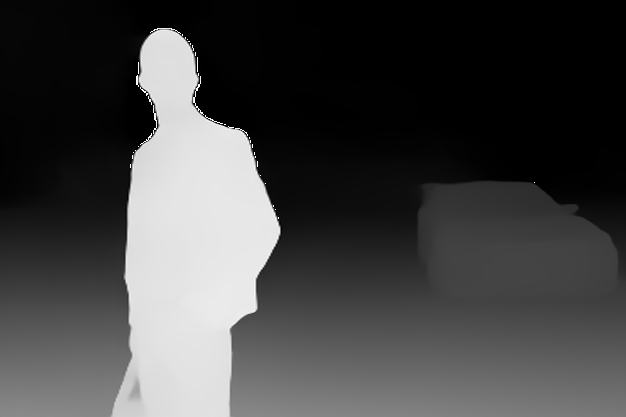

In [16]:
depth

In [17]:
import os
import gradio as gr
from transformers import pipeline

In [18]:
def launch(input_image):
    out = depth_estimator(input_image)

    # resize the prediction
    prediction = torch.nn.functional.interpolate(
        out["predicted_depth"].unsqueeze(1),
        size=input_image.size[::-1],
        mode="bicubic",
        align_corners=False,
    )

    # normalize the prediction
    output = prediction.squeeze().numpy()
    formatted = (output * 255 / np.max(output)).astype("uint8")
    depth = Image.fromarray(formatted)
    return depth

In [19]:
iface = gr.Interface(launch,
                     inputs=gr.Image(type='pil'),
                     outputs=gr.Image(type='pil'))

In [22]:
import os
os.environ['PORT8000'] = '8000'

In [25]:
iface.launch(share=True, server_port=int(os.environ['PORT8000']))

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://26376d3602e7097e96.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [26]:
iface.close()

Closing server running on port: 8000
